# Assessment

# Imports

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [170]:
data = pd.read_csv("./data/regional_cleaned.csv", index_col=0)

# check data is loaded as expected
pd.set_option("display.max_columns", None)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Area (km2),Population,Population Density,Increasing
0,2020-03-01,DKI Jakarta,2.0,0.0,0.0,2,39,20,41,-22,664,10846145,16334.31,0
1,2020-03-02,Riau,1.0,0.0,0.0,1,2,0,3,-1,87024,6074100,69.80,0
2,2020-03-02,DKI Jakarta,2.0,0.0,0.0,2,41,20,41,-20,664,10846145,16334.31,1
3,2020-03-03,DKI Jakarta,2.0,0.0,0.0,2,43,20,41,-18,664,10846145,16334.31,1
4,2020-03-03,Riau,0.0,0.0,0.0,0,2,0,3,-1,87024,6074100,69.80,0


# Decision Tree
https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

In [171]:
#attributes = data.drop(['Date', "Location", 'Increasing'], axis=1)
#target = data['Increasing']

#X_train, X_test, Y_train, Y_test = train_test_split(attributes, target, random_state=0)

In [172]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer(output_distribution='normal')

attributes = data.drop(['Date', "Location", 'Increasing'], axis=1)

attributes = transformer.fit_transform(attributes)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
attributes = sc.fit_transform(attributes)

attributes = pd.DataFrame(attributes, columns=["New Cases", "New Deaths", "New Recovered", "New Active Cases", "Total Cases", "Total Deaths", "Total Recovered", "Total Active Cases", "Area (km2)", "Population", "Population Density"])




# reform dataframe with scaled values
#filtered = pd.DataFrame(filtered, columns=['New Cases', "New Deaths", 'New Recovered', 'Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases', 'Population'])



target = data['Increasing']

X_train, X_test, Y_train, Y_test = train_test_split(attributes, target, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(attributes, target, random_state=0)

In [173]:
clf = DecisionTreeClassifier(max_depth = 2)

In [174]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [175]:
attributes.head()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Area (km2),Population,Population Density
0,-0.347948,-1.098578,-2.166113,0.120772,-1.551979,-0.690769,-1.230961,-2.356161,-3.427398,0.727441,3.433252
1,-0.432284,-1.098578,-2.166113,0.048944,-2.182564,-4.300421,-1.648187,-2.141942,0.578516,0.374936,-0.279407
2,-0.347948,-1.098578,-2.166113,0.120772,-1.543481,-0.690769,-1.230961,-2.342887,-3.427398,0.727441,3.433252
3,-0.347948,-1.098578,-2.166113,0.120772,-1.534322,-0.690769,-1.230961,-2.330015,-3.427398,0.727441,3.433252
4,-2.638329,-1.098578,-2.166113,-0.100632,-2.182564,-4.300421,-1.648187,-2.141942,0.578516,0.374936,-0.279407


[Text(334.8, 543.6, 'X[0] <= -0.948\ngini = 0.489\nsamples = 15837\nvalue = [9117, 6720]'),
 Text(167.4, 326.16, 'X[0] <= -3.177\ngini = 0.149\nsamples = 2722\nvalue = [2502, 220]'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 1644\nvalue = [1644, 0]'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.325\nsamples = 1078\nvalue = [858, 220]'),
 Text(502.20000000000005, 326.16, 'X[3] <= 0.448\ngini = 0.5\nsamples = 13115\nvalue = [6615, 6500]'),
 Text(418.5, 108.72000000000003, 'gini = 0.485\nsamples = 7953\nvalue = [4658, 3295]'),
 Text(585.9, 108.72000000000003, 'gini = 0.471\nsamples = 5162\nvalue = [1957, 3205]')]

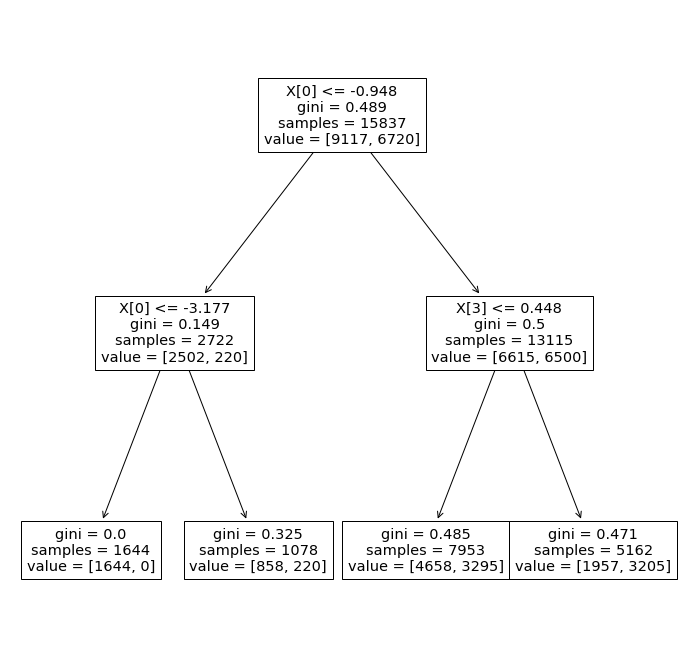

In [151]:
plt.figure(figsize=(12,12))

tree.plot_tree(clf)

In [176]:
# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [177]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.6587121212121212


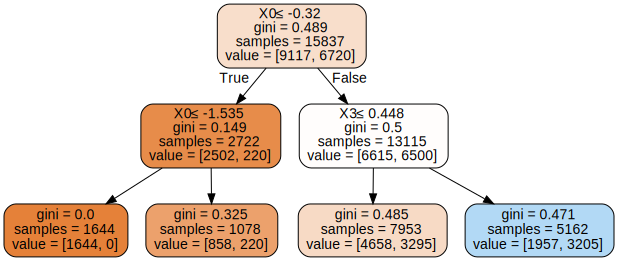

In [178]:
import graphviz 
#dot_data = tree.export_graphviz(dt_clf, out_file=None) 
#graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [179]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,New Cases,0.756
3,New Active Cases,0.244
1,New Deaths,0.000
2,New Recovered,0.000
4,Total Cases,0.000
5,Total Deaths,0.000
6,Total Recovered,0.000
7,Total Active Cases,0.000
8,Area (km2),0.000
9,Population,0.000


In [180]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 15))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

from statistics import mean
mean(accuracy)

0.6527191558441559

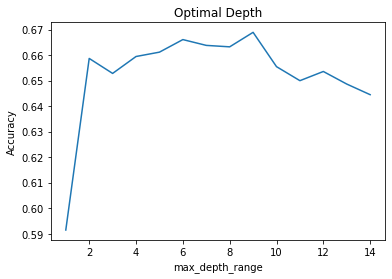

In [181]:
plt.plot(max_depth_range,accuracy)
plt.title('Optimal Depth')
plt.xlabel('max_depth_range')
plt.ylabel('Accuracy')
plt.show()

# Naive Bayes 
https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed

In [182]:
from sklearn.naive_bayes import GaussianNB

In [183]:
clf_nb = GaussianNB().fit(X_train, Y_train)

In [184]:
print(clf_nb.score(X_train, Y_train))

0.5885584390983141


In [185]:
print(clf_nb.score(X_test, Y_test))

0.5789772727272727


# SVM
https://towardsdatascience.com/svm-support-vector-machine-for-classification-710a009f6873

In [186]:
from sklearn.svm import SVR

In [187]:
svr = SVR(kernel = 'linear',C = 1000)

In [188]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
from sklearn import svm
svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_test,Y_test)

y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)
y_test_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [189]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [190]:
confusion_matrix(Y_test,y_test_pred)

array([[2580,  543],
       [1228,  929]], dtype=int64)

In [191]:
accuracy_score(Y_test,y_test_pred)

0.6645833333333333